In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import scipy.io
import time
import numpy as np
from Function.ReceptiveField import *
from Function.SNNModule_v2 import *
from Function.plot_SNN import *
from Function.SNN_230407 import *
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
print(f"GPU available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda}")

# Enable GPU support if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

deivce = 'cpu'

GPU available: True
CUDA version: 10.1
Using device: cuda


In [3]:
pixel_h, pixel_w = 3, 1

In [4]:
Output_layer, _ = generate_afferent_to_top_rf(
    [torch.tensor([[10, 10, 10]], device=device),
     torch.tensor([[10, 10, 10]], device=device)],
    pixel_h=1,
    pixel_w=3,
    step_size=1,
    device=device
)

synaptic_delays, _ = generate_afferent_to_top_rf(
    [torch.tensor([[0, 0, 0]], device=device),
     torch.tensor([[0, 2, 0]], device=device)],
    pixel_h=1,
    pixel_w=3,
    step_size=1,
    device=device
)

print(Output_layer, Output_layer.shape)
print(synaptic_delays, synaptic_delays.shape)

num_output_layer_neurons = len(Output_layer)
print(num_output_layer_neurons)


Complete! Generated 2 receptive fields from afferents to the top with kernel size 1x3. with step size 0x0
Complete! Generated 2 receptive fields from afferents to the top with kernel size 1x3. with step size 0x0
tensor([[10., 10., 10.],
        [10., 10., 10.]], device='cuda:0') torch.Size([2, 3])
tensor([[0., 0., 0.],
        [0., 2., 0.]], device='cuda:0') torch.Size([2, 3])
2


In [5]:
# Create Izhikevich layers
layers = [
    IzhikevichLayer(0.02, 0.2, -65, 8, num_neurons=num_output_layer_neurons, a_decay=1, buffer_size = 5,device=device),
]

# Create synapses
synapses = [
    Synapse(Output_layer, synaptic_delays, device=device),
]

layers initialized
Synapses initialized


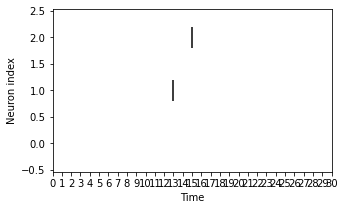

In [6]:
num_stim = 30

# Generate the stimuli and stack them up
stim = torch.zeros((pixel_h, num_stim), device=device)

# stim[0,5] = 1
# stim[2,5] = 1
stim[0,15] = 0
stim[2,15] = 1
stim[1,13] = 1


plot_spike_times(stim,xtick = np.arange(0, 31, 1))

Initializing SNN Model with 1 layers with device cuda


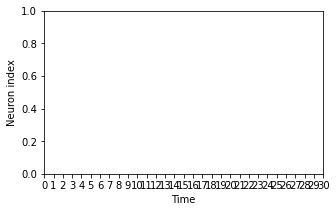

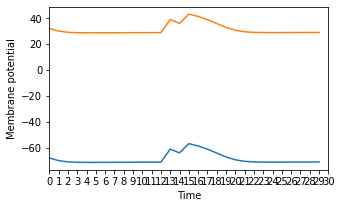

In [7]:
S = SNNModel(layers, synapses, device = device)

[spike_times,v] = S.feedforward(stim)

plot_spike_times(spike_times[0],xtick = np.arange(0, 31, 1))

plot_membrane_potential(v[0],xtick = np.arange(0, 31, 1))


In [8]:
delay = torch.tensor([[0, 1, 0]], device=device).t()
delay = 4-delay
pre_spike_times = torch.tensor([[0., 0., 0., 0., 1.],
                             [0., 0., 0., 1., 0.],
                             [0., 0., 0., 0., 1.]], device='cuda:0')

spikes_with_delay = torch.gather(
            pre_spike_times, 1, delay)
print(spikes_with_delay)

tensor([[1.],
        [1.],
        [1.]], device='cuda:0')


Initializing SNN Model with 1 layers with device cuda


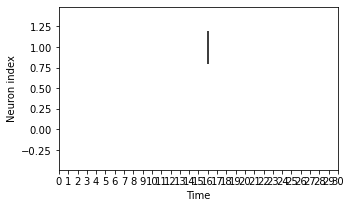

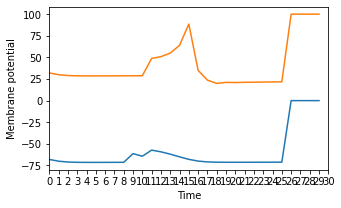

In [9]:
S = SNNModel(layers, synapses, device = device)

[spike_times,v] = S.feedforward_delay(stim)

plot_spike_times(spike_times[0],xtick = np.arange(0, 31, 1))

plot_membrane_potential(v[0],xtick = np.arange(0, 31, 1))

